### Visualization for Question Rating vs Answer Count

This section of the project report focuses on investigating whether higher-rated questions receive more answers on Stack Overflow. The objective is to analyze the relationship between question ratings and the number of answers they receive. By examining this correlation, we aim to gain insights into the behavior and dynamics of the Stack Overflow community.

To achieve this, we will utilize a dataset that includes information on question ratings and answer counts. Through statistical analysis and data visualization, we will explore any patterns or trends that may exist between question ratings and the corresponding number of answers. This analysis will provide valuable insights into the factors that contribute to the success and engagement of questions on Stack Overflow.

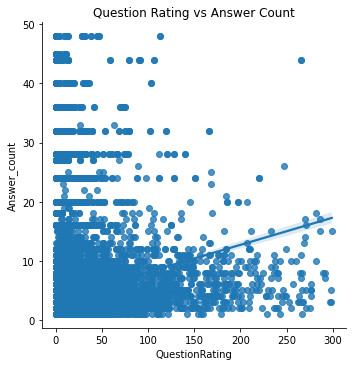

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Do higher rated questions get more answers?
answers = pd.read_csv('Answers_Processed.csv', encoding='latin1')
questions = pd.read_csv('Questions_Processed.csv', encoding='latin1')

# merge the cleaned dataframes
merged_data = pd.merge(questions, answers, on='Id')
merged_data.drop(["CreationDate_x", "CreationDate_y", "ClosedDate", "Title", "title_sentiment", "body_sentiment_x", "body_sentiment_y", "Body_y", "Body_x", "body_sentiment_y"], axis=1, inplace=True)

# calculate average number of answers for each score rating
answer_count_by_score = merged_data.groupby('Id')['Score_x'].count().reset_index()
answer_count_by_score.columns = ['Id', 'Answer_count']

merged_count = pd.merge(questions, answer_count_by_score, on='Id')
merged_count.drop(["CreationDate", "ClosedDate", "Title", "title_sentiment", "body_sentiment", "Body"], axis=1, inplace=True)
merged_count.columns = ['unnamed', 'Id', 'Tag', 'QuestionRating', 'Answer_count']

# # clean the data by removing outliers
merged_count = merged_count[merged_count['QuestionRating'] < 300]
merged_count = merged_count[merged_count['Answer_count'] < 50]
# merged.head()

# Plot the data
sns.lmplot(x='QuestionRating', y='Answer_count', data=merged_count)
plt.title('Question Rating vs Answer Count')
plt.show()

The graph above displays the relationship between question ratings and the number of answers. However, it is evident that there is little correlation between these two variables. In order to provide a clearer representation, the graph has been carefully filtered to remove outliers. This allows us to focus on the regions where the question ratings and answer counts are more densely populated, providing a more accurate analysis of their relationship.

## Question Rating Vs Answer Count for each language in the library

In [66]:
python_merged = merged_count[merged_count['Tag']=="python"]

cpp_merged = merged_count[merged_count['Tag']=="c++"]

java_merged = merged_count[merged_count['Tag']=="java"]

javascript_merged = merged_count[merged_count['Tag']=="javascript"]

c_merged = merged_count[merged_count['Tag']=="c"]

html_merged = merged_count[merged_count['Tag']=="html"]

sql_merged = merged_count[merged_count['Tag']=="sql"]

ruby_merged = merged_count[merged_count['Tag']=="ruby"]

php_merged = merged_count[merged_count['Tag']=="php"]


## Filter out any outliers

In [71]:
python_merged.head()
# remove outliers
python_merged = python_merged[python_merged['QuestionRating'] < 400]
python_merged = python_merged[python_merged['Answer_count'] < 100]

cpp_merged = cpp_merged[cpp_merged['QuestionRating'] < 400]
cpp_merged = cpp_merged[cpp_merged['Answer_count'] < 100]

java_merged = java_merged[java_merged['QuestionRating'] < 400]
java_merged = java_merged[java_merged['Answer_count'] < 100]

javascript_merged = javascript_merged[javascript_merged['QuestionRating'] < 400]
javascript_merged = javascript_merged[javascript_merged['Answer_count'] < 100]

c_merged = c_merged[c_merged['QuestionRating'] < 400]
c_merged = c_merged[c_merged['Answer_count'] < 100]

html_merged = html_merged[html_merged['QuestionRating'] < 400]
html_merged = html_merged[html_merged['Answer_count'] < 100]

sql_merged = sql_merged[sql_merged['QuestionRating'] < 400]
sql_merged = sql_merged[sql_merged['Answer_count'] < 100]

ruby_merged = ruby_merged[ruby_merged['QuestionRating'] < 400]
ruby_merged = ruby_merged[ruby_merged['Answer_count'] < 100]

php_merged = php_merged[php_merged['QuestionRating'] < 400]
php_merged = php_merged[php_merged['Answer_count'] < 100]

## Visualization for each language

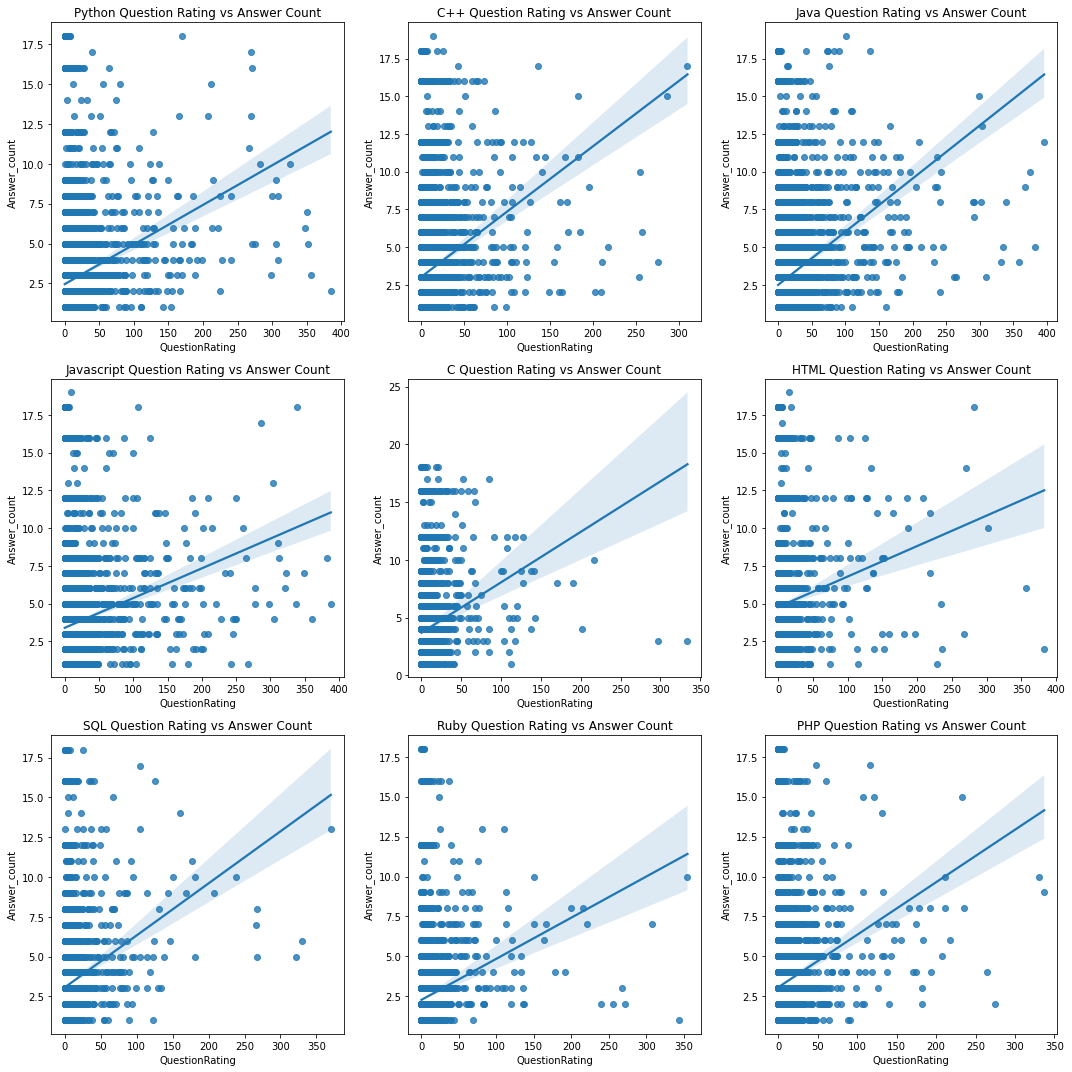

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid of subplots with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Define the datasets and corresponding titles
datasets = [python_merged, cpp_merged, java_merged, javascript_merged, c_merged, html_merged, sql_merged, ruby_merged, php_merged]
titles = ['Python', 'C++', 'Java', 'Javascript', 'C', 'HTML', 'SQL', 'Ruby', 'PHP']

# Iterate over the datasets and titles, and plot each graph in a separate subplot
for i, (data, title) in enumerate(zip(datasets, titles)):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.regplot(x='QuestionRating', y='Answer_count', data=data, ax=ax)
    axes[row, col].set_title(f'{title} Question Rating vs Answer Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


## Regression Testing

Mean Squared Error: 19.67826047884919


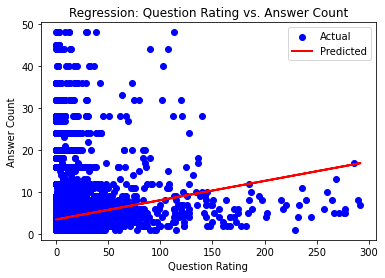

In [6]:
X = merged_count[['QuestionRating']]  # Input feature
y = merged_count['Answer_count']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
regression_model = LinearRegression()

# Train the model
regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the predicted values against the actual values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Question Rating')
plt.ylabel('Answer Count')
plt.title('Regression: Question Rating vs. Answer Count')
plt.legend()
plt.show()

The regression test performed above on the given data predict the average number of answers based on the question rating.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = merged_count[['QuestionRating']].values
y = merged_count['Answer_count'].apply(lambda x: 'low' if x <= 5 else 'medium' if x <= 10 else 'high')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    0  1776    13]
 [    0 23208    39]
 [    0  2190    39]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        high       0.00      0.00      0.00      1789
         low       0.85      1.00      0.92     23247
      medium       0.43      0.02      0.03      2229

    accuracy                           0.85     27265
   macro avg       0.43      0.34      0.32     27265
weighted avg       0.76      0.85      0.79     27265



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
